In [6]:
# Main Imports

import nilearn

from nilearn.image import resample_to_img

import pylab as plt

import numpy as np
import nibabel as nb
import os
import glob
import random
import pandas as pd
import re

import seaborn as sns #added
sns.set(style="darkgrid") #added

from nilearn.image import mean_img #added
from nilearn.plotting import plot_anat #added

In [7]:
# Local directory where the Data are mounted
rootDirectory = "/data/RMN/LUCA_PASQUINI"

# Local subdirectory where dataset is mounted
dataDir = "DATI_SEGMENTATI_SCALATI_media"

# Dataset dir
datasetDir = f"{rootDirectory}/{dataDir}"

#CSV fileroot 
fileName = f"{rootDirectory}/{dataDir}/Array_Labels_Def.csv"

In [34]:
ls {datasetDir}/ANGELONI_GIUSEPPINA

ADC_registered.nii*       FLAIRscalatamedia.nii*      T1_registered.nii*
ADC_registered.nii.gz*    MPRAGEMDC_registered.nii*   T1_registered.nii.gz*
ADCscalatamedia.nii*      MPRAGEMDCscalatamedia.nii*  T1scalatamedia.nii*
FLAIR_registered.nii*     ROI/                        file-list.txt*
FLAIR_registered.nii.gz*  T1MDC_registered.nii*
FLAIR_registered_.nii*    T1MDC_registered.nii.gz*


In [41]:
ls {datasetDir}/CELLINI_T

ADC_nuova.nii*          MPRAGEMDC_registered.nii*   file-list.txt*
ADC_registered.nii*     MPRAGEMDCscalatamedia.nii*  oldADC.nii.gz*
ADCscalatamedia.nii*    ROI/                        oldADC_pre.nii*
FLAIR.nii*              T2.nii*                     oldADC_pre.nii.gz*
FLAIR.nii.gz*           T2.nii.gz*                  rCBV.nii*
FLAIR_registered.nii*   T2_registered.nii*          rCBV_registered.nii*
FLAIRscalatamedia.nii*  T2scalatamedia.nii*         rCBVscalatamedia.nii*


In [ ]:
ls /data/RMN/dataset-gliomi/registered/

In [35]:
ls /data/RMN/dataset-gliomi/registered/

ls: cannot access '/data/RMN/dataset-gliomi/registered/': No such file or directory


In [96]:
IMG_reg = nb.load(f"{datasetDir}/ANGELONI_GIUSEPPINA/T1_registered.nii")
DATA= np.asarray(IMG_reg.dataobj)

In [38]:
DATA.shape

(224, 256, 72)

In [102]:
IMG_reg = nb.load(f"{datasetDir}/ASSANTO_MARIA/FLAIR_registered.nii")

In [132]:
affine=nb.load(f"{datasetDir}/ALESSANDRINI_GLAUCO/FLAIR_registered.nii").affine
affine

array([[-9.76262808e-01, -1.33213371e-05, -2.47701239e-02,
         8.53741379e+01],
       [ 1.35874478e-02,  8.07663560e-01, -5.61929822e-01,
        -5.91547089e+01],
       [-2.00144798e-02,  5.48957109e-01,  8.26749325e-01,
        -1.46797394e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [103]:
IMG_roi = nb.load(f"{datasetDir}/ASSANTO_MARIA/ROI/T2ROI.nii")

In [104]:
DATA= np.asarray(IMG_reg.dataobj)
ROI_DATA=np.asarray(IMG_roi.dataobj)
DATA.shape

(192, 256, 144)

In [105]:
Seq_mask_conv=DATA*ROI_DATA

In [106]:
np.count_nonzero(ROI_DATA*DATA)

114357

In [107]:
def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

In [108]:
I=bbox2_3D(ROI_DATA)

rmin=I[0]
rmax=I[1]
cmin=I[2]
cmax=I[3]
zmin=I[4]
zmax=I[5]

print(I)

(29, 91, 60, 137, 29, 121)


In [109]:
c = np.any(ROI_DATA, axis=(0, 2))
print(c)

len(c)



[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

256

In [110]:
delta_r=rmax-rmin
delta_c=cmax-cmin
delta_z=zmax-zmin


print(delta_r)
print(delta_c)
print(delta_z)

62
77
92


In [111]:
Obj=ROI_DATA[rmin:(rmin+delta_z),cmin:cmax,zmin:(zmin+delta_z)]


#Obj.tolist()

np.count_nonzero(Obj)

#Obj.tolist()

114326

In [112]:
# mask: f"{datasetDir}/{Path}/ROI/{MaskPath}.nii.gz"
# sequence: f"{datasetDir}/{Path}/{SEQUENCE_1}.nii"
def BrainBox(Mask_file, Sequence_file):
    
    mask_data = nb.load(Mask_file)
    Mask = np.asarray(mask_data.dataobj)
    
    r = np.any(Mask, axis=(1, 2))
    c = np.any(Mask, axis=(0, 2))
    z = np.any(Mask, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    #f"{Path}"
    #for i in range(3):
    #    if Mask.shape[i]==Sequence.shape[i] :
    #    print("All Elements in List are Equal")
    #else:        
    #    print(f"All Elements in {Path} are Not Equal")
    
    delta_r=rmax-rmin
    delta_c=cmax-cmin
    delta_z=zmax-zmin
    delta_max=np.amax([delta_r,delta_c,delta_z])
    
    # Load bounding boxed image
    sequence_data = nb.load(Sequence_file)
    
    # Apply bounding box
    return sequence_data.dataobj[(rmin):((rmin)+delta_max),(cmin):((cmin)+delta_max),(zmin):((zmin)+delta_max)]
    
    # Sequence=np.asarray(sequence_data.get_fdata())
    # Dim=[Sequence.shape]

    # BrainBox_Sequence=Sequence[(rmin):((rmin)+delta_max),(cmin):((cmin)+delta_max),(zmin):((zmin)+delta_max)]
    # return BrainBox_Sequence

In [113]:
def ReboundMask(Seq_mask_conv):
    r = np.any(Seq_mask_conv, axis=(1, 2))
    c = np.any(Seq_mask_conv, axis=(0, 2))
    z = np.any(Seq_mask_conv, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    delta_r=rmax-rmin
    delta_c=cmax-cmin
    delta_z=zmax-zmin
    
    delta_max=np.amax([delta_r,delta_c,delta_z])
    
    Rebounded_Sequence=Seq_mask_conv[rmin:(rmin+delta_max),cmin:(cmin+delta_max),zmin:(zmin+delta_max)]
    
    return Rebounded_Sequence

In [80]:
#ROI = nb.load(f"{datasetDir}/STAN_FLORENTINA/ROI/T2ROI.nii")
#Mask= np.asarray(ROI.dataobj)
#Mask.shape

(192, 256, 160)

In [121]:
New= ReboundMask(Seq_mask_conv)
New[0][1].shape

(92,)

In [117]:
brain_box=BrainBox(f"{datasetDir}/ASSANTO_MARIA/ROI/T2ROI.nii",f"{datasetDir}/ASSANTO_MARIA/FLAIR_registered.nii")

In [147]:
brain_box[4,:,:].shape

(92, 92)

In [131]:
l=len(brain_box[0][1])
l
percentile=65

In [127]:
len(Obj[0][1])

92

# Slice reduction

In [150]:
def PercentileSlicer(sequence_mask,brain_box,length,percentile,affine):
    for i in range(length):
        seq_sizes=np.sum(sequence_mask,axis=(0,1))
        non_empty_sizes = seq_sizes[np.where(seq_sizes > 0)]
        percentile_val = np.percentile(non_empty_sizes, percentile)
        seq_indexes = np.where(seq_sizes > percentile_val)[0]
    
    return np.asarray([brain_box[:,:,k] for k in seq_indexes])
    
    
    
        

In [151]:
brain_box_reduced=PercentileSlicer(New,brain_box,l,percentile,affine)

In [154]:
np.moveaxis(brain_box_reduced, 0, -1)

array([[[432.4069  , 460.0173  , 481.95547 , ...,  94.716965,
          89.32126 ,  82.525826],
        [492.6323  , 509.026   , 518.18207 , ..., 105.88076 ,
         102.39302 ,  98.527725],
        [529.8063  , 536.49023 , 541.7021  , ..., 143.44983 ,
         129.22789 , 119.46748 ],
        ...,
        [235.50658 , 239.39241 , 238.30284 , ..., 143.46164 ,
         125.97676 , 107.22787 ],
        [211.57124 , 213.37946 , 216.73242 , ..., 136.66301 ,
         124.26907 , 107.74787 ],
        [203.69948 , 197.7995  , 195.67946 , ..., 103.137344,
         102.70636 ,  96.648575]],

       [[517.6721  , 524.4181  , 529.85    , ..., 154.10512 ,
         145.37492 , 134.14691 ],
        [544.3597  , 549.15173 , 557.12274 , ..., 193.48376 ,
         188.12306 , 177.0203  ],
        [594.3192  , 603.3667  , 613.599   , ..., 241.86284 ,
         228.84155 , 214.78131 ],
        ...,
        [253.41873 , 261.8746  , 248.74696 , ..., 172.73837 ,
         150.8381  , 129.11935 ],
        [228

In [82]:
percentile=65
for i in range(len(Obj[0][1])):
    seq_sizes=np.sum(New,axis=(0,1))
    non_empty_sizes = seq_sizes[np.where(seq_sizes > 0)]
    percentile_val = np.percentile(non_empty_sizes, percentile)
    seq_indexes = np.where(seq_sizes > percentile_val)[0]

In [155]:
brain_box_reduced.shape

(32, 92, 92)

In [143]:
print(seq_indexes)
IMG_DATA_RED=np.asarray([DATA[k,:,:] for k in seq_indexes])


[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61]


In [99]:
import nibabel
img = nibabel.Nifti1Image(IMG_DATA_RED, affine=IMG_reg.affine)

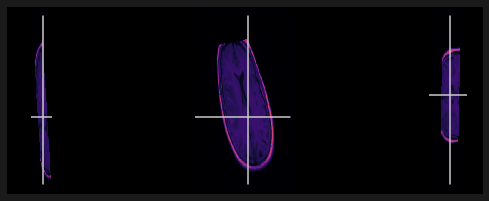

In [100]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='', annotate=False);

In [74]:
percentile=20
roi_data = ROI.get_fdata()
roi_shaped = resample_to_img(ROI, IMG_reg, interpolation='nearest')
roi_shaped_data = roi_shaped.get_fdata()
roi_sizes = np.sum(roi_shaped_data, axis=(0, 1))
non_empty_sizes = roi_sizes[np.where(roi_sizes > 0)]
percentile_val = np.percentile(non_empty_sizes, percentile)
roi_indexes = np.where(roi_sizes > percentile_val)[0]


In [75]:
print(roi_indexes)

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37]


In [76]:
DATA_RED=np.asarray([DATA[:,:,k] for k in roi_indexes])

    
    

In [77]:
# We need to turn this data into a nibabel image
import nibabel
img = nibabel.Nifti1Image(DATA_RED, affine=IMG_reg.affine)

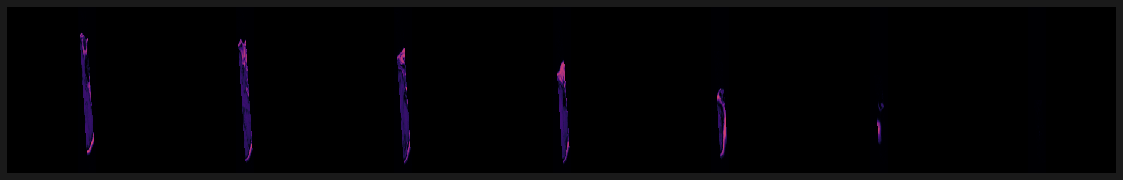

In [79]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='y', annotate=False);

In [ ]:
roi = s.get_roi(mask)
roi_shaped = resample_to_img(roi, t1_orig, interpolation='nearest')
roi_shaped_data = roi_shaped.get_fdata()
roi_sizes = np.sum(roi_shaped_data, axis=(0, 1))
non_empty_sizes = roi_sizes[np.where(roi_sizes > 0)]
percentile_val = np.percentile(non_empty_sizes, percentile)
roi_indexes = np.where(roi_sizes > percentile_val)[0]

In [20]:
IMG_reg.affine

array([[-9.75928724e-01, -3.41727573e-05, -3.60212810e-02,
         9.72776947e+01],
       [ 9.11666732e-03,  9.42952216e-01, -2.59919286e-01,
        -7.12850876e+01],
       [-3.39762643e-02,  2.53998816e-01,  9.64926600e-01,
        -1.17044640e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [21]:
np.count_nonzero(Mask)

181343

In [22]:
np.count_nonzero(New)

181342

In [23]:
B=nilearn.image.new_img_like(IMG_reg,New, affine=None, copy_header=False)

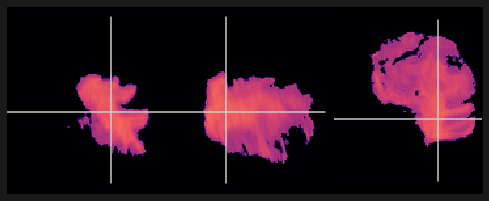

In [24]:
plot_anat(B, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);

In [85]:
source_affine = IMG_reg.affine
#source_affine[:2, 3] = np.array([96, 64])

source_affine

array([[-9.75928724e-01, -3.41727573e-05, -3.60212810e-02,
         9.72776947e+01],
       [ 9.11666732e-03,  9.42952216e-01, -2.59919286e-01,
        -7.12850876e+01],
       [-3.39762643e-02,  2.53998816e-01,  9.64926600e-01,
        -1.17044640e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [96]:
# Rotate it slightly
angle = np.pi / 180 * 60
rotation_matrix = np.array([[-np.cos(angle), np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
#source_affine_transformed= rotation_matrix* source_affine[:2, :2]  
#source_affine_transformed

In [97]:
source_affine[:2, :2] =rotation_matrix
source_affine

array([[-5.00000000e-01,  8.66025404e-01, -3.60212810e-02,
         9.72776947e+01],
       [ 8.66025404e-01,  5.00000000e-01, -2.59919286e-01,
        -7.12850876e+01],
       [-3.39762643e-02,  2.53998816e-01,  9.64926600e-01,
        -1.17044640e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [98]:
# We need to turn this data into a nibabel image
import nibabel
img = nibabel.Nifti1Image(New, affine=source_affine)



In [99]:
e=np.asarray(img.dataobj)
e.shape

(110, 110, 110)

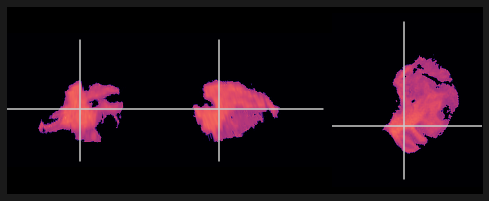

In [100]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);

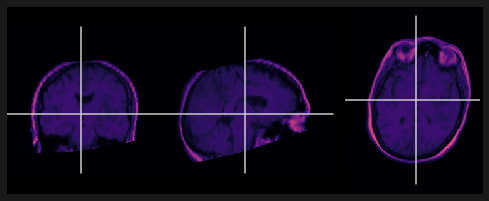

In [5]:
plot_anat(IMG_reg, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);